# **Environmental Conditions Analysis and Energy Consumption Prediction for Greenhouses**

_<Detailed information about the project here including greenhouse, its location, layout, weather station, sensors, data collector, explanation of each column in data files etc.>_

## **Libraries**

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Data**

### 1. East Greenhouse

#### a. East Fan Wall Side Data

In [2]:
# EF indicates East Fan wall side
East_FW = pd.read_excel("../data/Oct-25_East.xlsx", sheet_name="EF")
East_FW.head()

,Date_EF,PPFD_EF,Temperature_EF,Humidity_EF,CO2_EF,Dew Point_EF,VPD_EF,Pressure_EF
0,Oct 1 2025 12:00:00 AM,0.000,20.455,98.275,634.4,20.097,0.042,99.524
1,Oct 1 2025 12:10:00 AM,0.000,20.437,98.661,639.1,20.142,0.032,99.520
2,Oct 1 2025 12:20:00 AM,0.000,20.422,98.523,637.5,20.105,0.036,99.515
3,Oct 1 2025 12:30:00 AM,0.023,20.325,98.644,643.4,20.028,0.032,99.520
4,Oct 1 2025 12:40:00 AM,0.000,20.403,98.517,629.4,20.084,0.036,99.512


#### b. East Cool Wall Side Data

In [3]:
# EC indicates East cool wall side
East_CW = pd.read_excel("../data/Oct-25_East.xlsx", sheet_name="EC")
East_CW.head()

,Date_EC,PPFD_EC,Temperature_EC,Humidity_EC,CO2_EC,Dew Point_EC,VPD_EC,Pressure_EC
0,Oct 1 2025 12:00:00 AM,0.028,20.228,99.306,653.0,20.039,0.016,99.458
1,Oct 1 2025 12:10:00 AM,0.027,20.266,99.247,655.7,20.068,0.018,99.451
2,Oct 1 2025 12:20:00 AM,0.042,20.236,99.256,655.0,20.039,0.018,99.449
3,Oct 1 2025 12:30:00 AM,0.020,20.193,99.321,655.9,20.007,0.016,99.456
4,Oct 1 2025 12:40:00 AM,0.080,20.216,99.235,651.3,20.016,0.018,99.450


### 2. West Greenhouse

#### a. West Fan Wall Side Data

_We don't have the data for West fan wall side as the weather station went under maintenance_

#### b. West Cool Wall Side Data

In [4]:
# WC indicates West cool wall side
West_CW = pd.read_excel("../data/Oct-25_West.xlsx")
West_CW.head()

,Date_WC,PPFD_WC,Temperature_WC,Humidity_WC,CO2_WC,Dew Point_WC,VPD_WC,Pressure_WC
0,Oct 1 2025 12:00:00 AM,0.010,20.756,99.547,721.9,20.600,0.011,99.500
1,Oct 1 2025 12:10:00 AM,0.028,20.637,99.767,732.3,20.518,0.006,99.491
2,Oct 1 2025 12:20:00 AM,0.000,20.457,99.920,727.4,20.364,0.002,99.486
3,Oct 1 2025 12:30:00 AM,0.047,20.852,99.315,745.4,20.657,0.017,99.493
4,Oct 1 2025 12:40:00 AM,0.000,20.441,99.941,725.9,20.352,0.001,99.487


### 3. Ambient Data

In [5]:
Amb_Dat = pd.read_excel("../data/Oct-25_Outside.xlsx")
Amb_Dat.head()

,time,Solar Radiation_out,Precipitation,Lightning Activity,km Lightning Distance,° Wind Direction,m/s Wind Speed,m/s Gust Speed,Temperature_out,kPa Vapor Pressure,Pressure_out,° X-axis Level,° Y-axis Level,mm/h Max Precip Rate,°C RH Sensor Temp,VPD_out,% Battery Percent,mV Battery Voltage,kPa Reference Pressure,°C Logger Temperature
0,2025-10-01 00:00:00,0.0,0.000,0,0,230,0.28,0.86,19.6,2.283,99.49,0.5,1.4,0.0,19.5,0.0,100,8118,99.37,19.3
1,2025-10-01 00:15:00,0.0,0.017,0,0,201,0.41,0.84,19.7,2.295,99.48,0.5,1.4,1.0,19.5,0.0,100,8091,99.36,19.5
2,2025-10-01 00:30:00,0.0,0.000,0,0,206,0.38,0.71,19.6,2.285,99.48,0.5,1.4,0.0,19.5,0.0,100,8096,99.36,19.4
3,2025-10-01 00:45:00,0.0,0.000,0,0,195,0.31,0.59,19.7,2.295,99.48,0.5,1.4,0.0,19.5,0.0,100,8097,99.37,19.3
4,2025-10-01 01:00:00,0.0,0.000,0,0,209,0.37,0.84,19.7,2.289,99.47,0.5,1.5,0.0,19.5,0.0,100,8095,99.36,19.3


### 4. Energy Consumption Data

In [6]:
Energy_Cons = pd.read_excel("../data/Oct-25_Energy.xlsx")
Energy_Cons.head()

,Date,Energy _East,Energy _West
0,2025-10-01 00:00:00.000,1.206440,0.893626
1,2025-10-01 01:00:00.000,1.224793,0.653910
2,2025-10-01 02:00:00.000,1.213534,0.656950
3,2025-10-01 03:00:00.005,1.223580,0.653320
4,2025-10-01 04:00:00.010,1.124309,0.535340


## **Data Exploration**

_Include what we did here_

In [7]:
# East Fall Wall Side
print(f"Data types:\n{East_FW.dtypes}")
print(f"\nData shape:{East_FW.shape}")

Data types:
Date_EF             object
 PPFD_EF           float64
 Temperature_EF    float64
 Humidity_EF       float64
 CO2_EF            float64
 Dew Point_EF      float64
 VPD_EF            float64
 Pressure_EF       float64
dtype: object

Data shape:(4207, 8)


In [8]:
# East Cool Wall Side
print(f"Data types:\n{East_CW.dtypes}")
print(f"\nData shape:{East_CW.shape}")

Data types:
Date_EC             object
 PPFD_EC           float64
 Temperature_EC    float64
 Humidity_EC       float64
 CO2_EC            float64
 Dew Point_EC      float64
 VPD_EC            float64
 Pressure_EC       float64
dtype: object

Data shape:(4459, 8)


In [9]:
# West Cool Wall Side
print(f"Data types:\n{West_CW.dtypes}")
print(f"\nData shape:{West_CW.shape}")

Data types:
Date_WC             object
 PPFD_WC           float64
 Temperature_WC    float64
 Humidity_WC       float64
 CO2_WC            float64
 Dew Point_WC      float64
 VPD_WC            float64
 Pressure_WC       float64
dtype: object

Data shape:(4463, 8)


In [10]:
# Ambient
print(f"Data types:\n{Amb_Dat.dtypes}")
print(f"\nData shape:{Amb_Dat.shape}")

Data types:
time                       datetime64[ns]
 Solar Radiation_out              float64
Precipitation                     float64
 Lightning Activity                 int64
 km Lightning Distance              int64
° Wind Direction                    int64
 m/s Wind Speed                   float64
 m/s Gust Speed                   float64
Temperature_out                   float64
 kPa Vapor Pressure               float64
Pressure_out                      float64
° X-axis Level                    float64
° Y-axis Level                    float64
 mm/h Max Precip Rate             float64
 °C RH Sensor Temp                float64
 VPD_out                          float64
% Battery Percent                   int64
 mV Battery Voltage                 int64
 kPa Reference Pressure           float64
 °C Logger Temperature            float64
dtype: object

Data shape:(2976, 20)


In [11]:
# Energy Consumption
print(f"Data types:\n{Energy_Cons.dtypes}")
print(f"\nData shape:{Energy_Cons.shape}")

Data types:
Date            datetime64[ns]
Energy _East           float64
Energy _West           float64
dtype: object

Data shape:(744, 3)


## **Data Cleaning and Manipulation**

_Description of what we have done in this section_

### 1. Remove Whitespaces from Column Names

In [12]:
# function to remove whitespaces


def rm_col_whitespace(df):
    """
    Remove leading/trailing whitespace from all column
    names in a DataFrame.
    """
    df.columns = df.columns.str.strip()
    return df

In [13]:
East_FW = rm_col_whitespace(East_FW)
East_CW = rm_col_whitespace(East_CW)
West_CW = rm_col_whitespace(West_CW)
Amb_Dat = rm_col_whitespace(Amb_Dat)
Energy_Cons = rm_col_whitespace(Energy_Cons)

### 2. Convert timestamps into `datetime` type

In [14]:
# function to convert timestamps into datetime type


def convert_timestamp(data, fmt="%b %d %Y %I:%M:%S %p"):
    """
    Strips whitespace and converts a string datetime Series
    to pandas datetime64[ns] from given format.
    """
    return pd.to_datetime(data, format=fmt, errors="coerce")

In [15]:
East_FW["Date_EF"] = convert_timestamp(East_FW["Date_EF"])
East_CW["Date_EC"] = convert_timestamp(East_CW["Date_EC"])
West_CW["Date_WC"] = convert_timestamp(West_CW["Date_WC"])

In [16]:
# verify
print(East_FW["Date_EF"].dtype)
print(East_CW["Date_EC"].dtype)
print(West_CW["Date_WC"].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


### 3. Convert Units for Solar Radation for Ambient Data

In [17]:
Amb_Dat["PPFD_out"] = Amb_Dat["Solar Radiation_out"] * 4.6 * 0.45

In [18]:
# Verify
Amb_Dat[["time", "Solar Radiation_out", "PPFD_out"]].sample(5)

,time,Solar Radiation_out,PPFD_out
351,2025-10-04 15:45:00,319.5,661.365
1257,2025-10-14 02:15:00,0.0,0.000
1692,2025-10-18 15:00:00,344.5,713.115
126,2025-10-02 07:30:00,33.6,69.552
1831,2025-10-20 01:45:00,0.0,0.000


### 4. Removing Sensor Noise and Outliers/Unrealistic Values

#### a. Greenhouse Data

In [19]:
import pandas as pd


def col_min_max(df, numeric_only=True):
    """
    Return a DataFrame with min and max for each column.
    """
    data = df.select_dtypes(include="number") if numeric_only else df
    return pd.DataFrame({"min": data.min(), "max": data.max()})

In [20]:
print(f"East Fan Side:\n{col_min_max(East_FW)}")
print(f"East Cool Side:\n{col_min_max(East_CW)}")
print(f"West Cool Side:\n{col_min_max(West_CW)}")

East Fan Side:
                    min      max
PPFD_EF           0.000  963.112
Temperature_EF   17.936   32.771
Humidity_EF      26.951  100.000
CO2_EF          372.700  733.000
Dew Point_EF      4.665   27.581
VPD_EF            0.000    2.321
Pressure_EF      98.576  100.478
East Cool Side:
                    min        max
PPFD_EC           0.000  86267.487
Temperature_EC   18.062     32.579
Humidity_EC      24.618    100.000
CO2_EC          486.400    798.800
Dew Point_EC      3.662     28.616
VPD_EC            0.000      2.555
Pressure_EC      98.523    100.423
West Cool Side:
                    min       max
PPFD_WC           0.000  1169.315
Temperature_WC   12.869    31.625
Humidity_WC      25.969   100.000
CO2_WC          450.600  1708.500
Dew Point_WC      4.835    27.426
VPD_WC            0.000     2.478
Pressure_WC      98.581   100.479


It is clear from the output that, there are some outliers present in the PPFD values in greenhouse dataset (especially in the `East Cool Wall` data, while the other variables seems to be within a natural range. It can be further verified through boxplots.

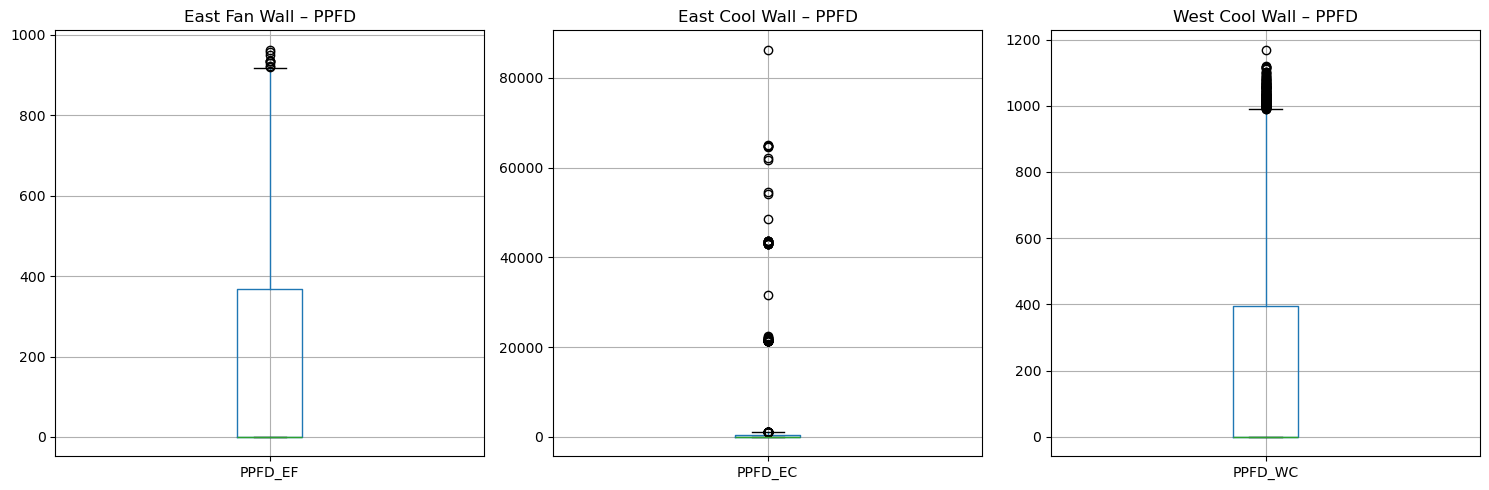

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

East_FW.boxplot(column=["PPFD_EF"], ax=axes[0])
axes[0].set_title("East Fan Wall – PPFD")

East_CW.boxplot(column=["PPFD_EC"], ax=axes[1])
axes[1].set_title("East Cool Wall – PPFD")

West_CW.boxplot(column=["PPFD_WC"], ax=axes[2])
axes[2].set_title("West Cool Wall – PPFD")

plt.tight_layout()
plt.show()

Solar radiation can't be greater than the solar constant (i.e., the amount of solar electromagnetic radiation received per unit area at the top of Earth's atmosphere when the Sun is at its average distance from the Earth; 1367 w/m<sup>2</sup>). If we convert the solar constant into PPFD, it becomes `1367 x 4.6 x 0.45` or `2829.69` μmol/m<sup>2</sup>/s. But a fraction of this energy will be lost while coming across Earth's atmosphere. Thus we are capping the maximum value for PPFD as `2500` μmol/m<sup>2</sup>/s; any values greater than 2500 will be replaced by the avergae of the previous and next values. We are also removing any value that is less than `0.2`

In [22]:
# function to remove outliers


def rm_ppfd_outlrs(data, low_thresh=0.2, high_thresh=2500):
    """
    Remove outliers from PPFD based on highest and lowest thresholds.
    Values < low_thresh are set to 0. Values > high_thresh are
    replaced with the mean of the previous and next values.
    """
    d = data.astype(float).copy()

    d = d.mask(d < low_thresh, 0)

    prev_ = d.shift(1)
    next_ = d.shift(-1)
    neighbor_mean = (prev_.fillna(next_) + next_.fillna(prev_)) / 2

    d = d.mask(d > high_thresh, neighbor_mean)

    return d

In [23]:
East_FW["PPFD_EF"] = rm_ppfd_outlrs(East_FW["PPFD_EF"])
East_CW["PPFD_EC"] = rm_ppfd_outlrs(East_CW["PPFD_EC"])
West_CW["PPFD_WC"] = rm_ppfd_outlrs(West_CW["PPFD_WC"])

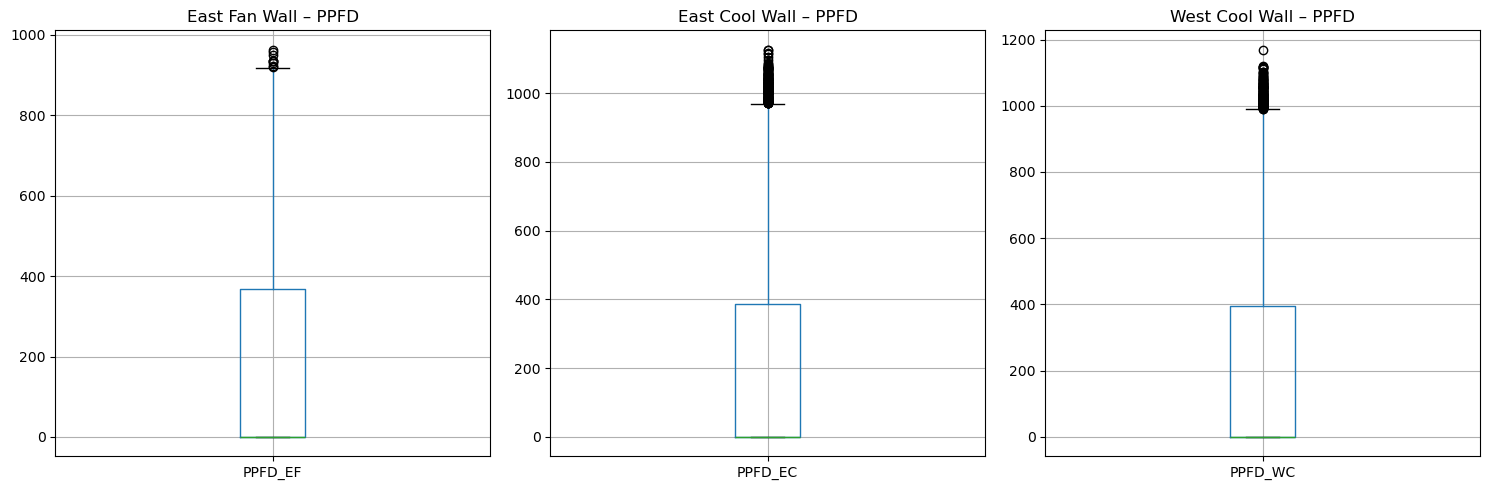

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

East_FW.boxplot(column=["PPFD_EF"], ax=axes[0])
axes[0].set_title("East Fan Wall – PPFD")

East_CW.boxplot(column=["PPFD_EC"], ax=axes[1])
axes[1].set_title("East Cool Wall – PPFD")

West_CW.boxplot(column=["PPFD_WC"], ax=axes[2])
axes[2].set_title("West Cool Wall – PPFD")

plt.tight_layout()
plt.show()

The data looks much better, especially for the `East Cool Wall`. Although, it might seem that there are still some oultiers, but we are not addressing them as outliers; these might be some extreme values that has a possibility to occur in a greenhouse.

#### b. Ambient Data

In [82]:
cols_amb = ["time", "PPFD_out", "Temperature_out", "Pressure_out", "VPD_out"]

Amb_Dat_sel = Amb_Dat[cols_amb]

In [83]:
Amb_Dat_sel.describe()

,time,PPFD_out,Temperature_out,Pressure_out,VPD_out
count,2976,2976.000000,2976.000000,2976.000000,2976.000000
mean,2025-10-16 11:52:29.999999744,315.397957,17.524597,99.711462,0.387285
min,2025-10-01 00:00:00,0.000000,1.400000,98.540000,0.000000
25%,2025-10-08 17:56:15,0.000000,12.500000,99.460000,0.010000
50%,2025-10-16 11:52:30,0.000000,17.600000,99.750000,0.130000
75%,2025-10-24 05:48:45,566.352000,22.400000,99.990000,0.560000
max,2025-10-31 23:45:00,1559.745000,29.900000,100.420000,2.300000
std,NaN,472.709293,6.091901,0.369360,0.527128


The data here looks fairly normal and does not need any manipulations (capping out maximum and minimum) as they fit into our criteria.

### 5. Resampling the Data

_Include why did we resampled the data_

In [84]:
# function to resample the data in an hourly basis


def resample_time(df, time_col, freq="H", how="mean"):
    """
    Resamples data into an hourly basis. Uses 'mean' as
    the aggregation method.
    """
    return df.set_index(time_col).resample(freq).agg(how).reset_index()

In [85]:
East_FW_hr = resample_time(East_FW, time_col="Date_EF", freq="h")
East_CW_hr = resample_time(East_CW, time_col="Date_EC", freq="h")
West_CW_hr = resample_time(West_CW, time_col="Date_WC", freq="h")

Amb_hr = resample_time(Amb_Dat_sel, time_col="time", freq="h")

In [86]:
# verify
East_FW_hr.head()

,Date_EF,PPFD_EF,Temperature_EF,Humidity_EF,CO2_EF,Dew Point_EF,VPD_EF,Pressure_EF
0,2025-10-01 00:00:00,0.0,20.419167,98.546500,636.683333,20.105500,0.035000,99.517833
1,2025-10-01 01:00:00,0.0,20.394000,98.453500,639.333333,20.065167,0.037333,99.515000
2,2025-10-01 02:00:00,0.0,20.388667,98.566833,573.033333,20.078500,0.034500,99.514000
3,2025-10-01 03:00:00,0.0,20.390833,97.727833,592.500000,19.943833,0.054500,99.529667
4,2025-10-01 04:00:00,0.0,20.364333,98.102333,598.583333,19.978667,0.045333,99.545667


In [87]:
Amb_hr.head()

,time,PPFD_out,Temperature_out,Pressure_out,VPD_out
0,2025-10-01 00:00:00,0.0,19.650,99.4825,0.0000
1,2025-10-01 01:00:00,0.0,19.725,99.4800,0.0100
2,2025-10-01 02:00:00,0.0,19.925,99.4775,0.0075
3,2025-10-01 03:00:00,0.0,19.500,99.4900,0.0025
4,2025-10-01 04:00:00,0.0,19.550,99.5100,0.0000


### 6. Renaming Columns

In [101]:
East_FW_hr.rename(
    columns={
        "Date_EF": "Timestamp",
        "PPFD_EF": "PPFD",
        "Temperature_EF": "Temperature",
        "Humidity_EF": "Humidity",
        "CO2_EF": "CO2",
        "Dew Point_EF": "Dew Point",
        "VPD_EF": "VPD",
        "Pressure_EF": "Pressure",
    },
    inplace=True,
)

In [102]:
East_CW_hr.rename(
    columns={
        "Date_EC": "Timestamp",
        "PPFD_EC": "PPFD",
        "Temperature_EC": "Temperature",
        "Humidity_EC": "Humidity",
        "CO2_EC": "CO2",
        "Dew Point_EC": "Dew Point",
        "VPD_EC": "VPD",
        "Pressure_EC": "Pressure",
    },
    inplace=True,
)

In [103]:
West_CW_hr.rename(
    columns={
        "Date_WC": "Timestamp",
        "PPFD_WC": "PPFD",
        "Temperature_WC": "Temperature",
        "Humidity_WC": "Humidity",
        "CO2_WC": "CO2",
        "Dew Point_WC": "Dew Point",
        "VPD_WC": "VPD",
        "Pressure_WC": "Pressure",
    },
    inplace=True,
)

In [104]:
Amb_hr.rename(
    columns={
        "time": "Timestamp",
        "PPFD_out": "PPFD",
        "Temperature_out": "Temperature",
        "VPD_out": "VPD",
        "Pressure_out": "Pressure",
    },
    inplace=True,
)

In [105]:
# verify
East_CW_hr.head()

,Timestamp,PPFD,Temperature,Humidity,CO2,Dew Point,VPD,Pressure,Location
0,2025-10-01 00:00:00,0.0,20.240500,99.253500,654.350000,20.043167,0.017667,99.452333,East Cool Wall
1,2025-10-01 01:00:00,0.0,20.257167,99.204333,657.666667,20.051500,0.019000,99.452000,East Cool Wall
2,2025-10-01 02:00:00,0.0,20.265333,99.223167,588.616667,20.062667,0.018500,99.449833,East Cool Wall
3,2025-10-01 03:00:00,0.0,20.267000,99.190000,608.200000,20.059000,0.019167,99.464000,East Cool Wall
4,2025-10-01 04:00:00,0.0,20.219500,99.204167,612.033333,20.014000,0.019000,99.479000,East Cool Wall


### 7. Add Location Info to Data

In [90]:
East_FW_hr["Location"] = "East Fan Wall"
East_CW_hr["Location"] = "East Cool Wall"
West_CW_hr["Location"] = "West Cool Wall"
Amb_hr["Location"] = "Ambient"

In [91]:
# verify
Amb_hr.head()

,Timestamp,PPFD,Temperature,Pressure,VPD,Location
0,2025-10-01 00:00:00,0.0,19.650,99.4825,0.0000,Ambient
1,2025-10-01 01:00:00,0.0,19.725,99.4800,0.0100,Ambient
2,2025-10-01 02:00:00,0.0,19.925,99.4775,0.0075,Ambient
3,2025-10-01 03:00:00,0.0,19.500,99.4900,0.0025,Ambient
4,2025-10-01 04:00:00,0.0,19.550,99.5100,0.0000,Ambient


### 8. Merge Data

In [92]:
GH_merged = pd.concat([East_FW_hr, East_CW_hr, West_CW_hr, Amb_hr], ignore_index=True)

In [93]:
# verify
GH_merged.sample(5)

,Timestamp,PPFD,Temperature,Humidity,CO2,Dew Point,VPD,Pressure,Location
965,2025-10-10 05:00:00,0.000000,19.952500,74.326667,556.416667,15.216333,0.599833,100.181833,East Cool Wall
480,2025-10-21 00:00:00,0.000000,20.060667,77.695667,570.466667,16.004167,0.525833,99.783000,East Fan Wall
98,2025-10-05 02:00:00,0.000000,20.384833,87.770833,490.800000,18.230833,0.293167,99.882167,East Fan Wall
1000,2025-10-11 16:00:00,436.586167,25.532167,45.400500,514.400000,12.847000,1.788500,99.159167,East Cool Wall
1976,2025-10-21 08:00:00,307.756167,18.948667,98.407833,684.283333,18.628000,0.035500,99.859500,West Cool Wall


## **Data Plotting**

### 1. Temperature

#### a. Hourly Temperature for All Greenhouse Locations

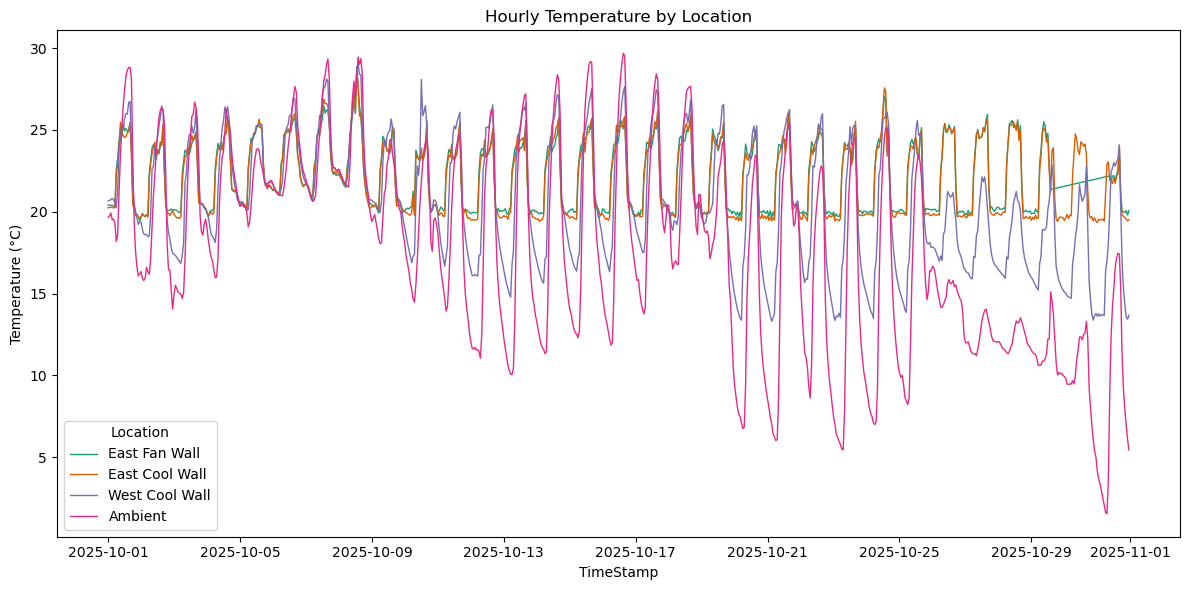

In [96]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=GH_merged, x="Timestamp", y="Temperature", hue="Location", palette="Dark2", linewidth=1
)
plt.xlabel("TimeStamp")
plt.ylabel("Temperature (°C)")
plt.title("Hourly Temperature by Location")
plt.tight_layout()
plt.show()

#### b. East vs. West Greenhouse

_Note:_ Since we don't have the data for West Fan Wall side (see earlier explanation), we are assuming the average data for West greenhouse as West Fan Wall side data.

### 2. PPFD

## Average PPFD of East & West side

In [ ]:
# Filter
PPFD_east_fan = melted_PPFD[melted_PPFD["Location"] == "East Fan"]
PPFD_east_cool = melted_PPFD[melted_PPFD["Location"] == "East Cool"]
PPFD_west_fan = melted_PPFD[melted_PPFD["Location"] == "West Fan"]
PPFD_west_cool = melted_PPFD[melted_PPFD["Location"] == "West Cool"]

# Combine the two DataFrames
combined_east_PPFD = pd.concat([PPFD_east_fan, PPFD_east_cool])
combined_west_PPFD = pd.concat([PPFD_west_fan, PPFD_west_cool])

# Average the PPFD by Date
averaged_PPFD_east = combined_east_PPFD.groupby("Date").agg({"PPFD_Value": "mean"})
averaged_PPFD_west = combined_west_PPFD.groupby("Date").agg({"PPFD_Value": "mean"})

# Display hourly average PPFD data
print(averaged_PPFD_east)

In [ ]:
# Create a new Excel file with both datasets in separate sheets
output_file_PPFD = "/content/Oct-25_PPFD.xlsx"

with pd.ExcelWriter(output_file_PPFD) as writer:
    hourly_PPFD_EF.to_excel(writer, sheet_name="East fan")
    hourly_PPFD_EC.to_excel(writer, sheet_name="East cool")
    averaged_PPFD_east.to_excel(writer, sheet_name="Average East")
    hourly_PPFD_WF.to_excel(writer, sheet_name="West fan")
    hourly_PPFD_WC.to_excel(writer, sheet_name="West cool")
    averaged_PPFD_west.to_excel(writer, sheet_name="Average West")
    hourly_PPFD_out.to_excel(writer, sheet_name="Outside")

In [ ]:
# Load the data from the Excel file
file_path_PPFD = "/content/Oct-25_PPFD.xlsx"
PPFD_east_avg = pd.read_excel(file_path_PPFD, sheet_name="Average East")
PPFD_west_avg = pd.read_excel(file_path_PPFD, sheet_name="Average West")

# Rename date columns for consistency
PPFD_east_avg.rename(columns={"Date": "Date", "PPFD_Value": "PPFD"}, inplace=True)
PPFD_west_avg.rename(columns={"Date": "Date", "PPFD_Value": "PPFD"}, inplace=True)

# Add a Location column to each DataFrame
PPFD_east_avg["Location"] = "East PPFD"
PPFD_west_avg["Location"] = "West PPFD"

# Combine the data
combined_PPFD1 = pd.concat([PPFD_east_avg, PPFD_west_avg, outside_PPFD], ignore_index=True)

# Reshape the data to long format
melted_PPFD1 = pd.melt(
    combined_PPFD1,
    id_vars=["Location", "Date"],
    value_vars=["PPFD"],
    var_name="PPFD_Type",  # This can be kept as-is
    value_name="PPFD_Value",
)  # Changed from 'PPFD' to

melted_PPFD1.head()

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_PPFD1, x="Date", y="PPFD_Value", hue="Location")
plt.title("Hourly PPFD (October-2025)", fontsize=14, fontweight="bold")
plt.xlabel("Time", fontsize=12, fontweight="bold")
plt.ylabel("PPFD (micro mol/m2/s)", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.tight_layout()
plt.show()

### VPD Plotting ###

In [ ]:
# Load the data from the Excel file VPD
file_path_VPD = "/content/Oct-25_VPD.xlsx"
east_fan_VPD = pd.read_excel(file_path_VPD, sheet_name="East fan")
east_cool_VPD = pd.read_excel(file_path_VPD, sheet_name="East cool")
west_fan_VPD = pd.read_excel(file_path_VPD, sheet_name="West fan")
west_cool_VPD = pd.read_excel(file_path_VPD, sheet_name="West cool")
outside_VPD = pd.read_excel(file_path_VPD, sheet_name="Outside")

# Rename date columns for consistency
east_fan_VPD.rename(columns={"Date_EF": "Date", "VPD_EF": "VPD"}, inplace=True)
east_cool_VPD.rename(columns={"Date_EC": "Date", "VPD_EC": "VPD"}, inplace=True)
west_fan_VPD.rename(columns={"Date_WF": "Date", "VPD_WF": "VPD"}, inplace=True)
west_cool_VPD.rename(columns={"Date_WC": "Date", "VPD_WC": "VPD"}, inplace=True)
outside_VPD.rename(columns={"time": "Date", "VPD_out": "VPD"}, inplace=True)

# Add a Location column to each DataFrame
east_fan_VPD["Location"] = "East Fan"
east_cool_VPD["Location"] = "East Cool"
west_fan_VPD["Location"] = "West Fan"
west_cool_VPD["Location"] = "West Cool"
outside_VPD["Location"] = "Outside"

# Combine the data
combined_VPD = pd.concat(
    [east_fan_VPD, east_cool_VPD, west_fan_VPD, west_cool_VPD, outside_VPD], ignore_index=True
)

# Reshape the data to long format
melted_VPD = pd.melt(
    combined_VPD,
    id_vars=["Location", "Date"],
    value_vars=["VPD"],
    var_name="VPD_Type",  # This can be kept as-is
    value_name="VPD_Value",
)  # Changed from 'VPD' to

melted_VPD.head()

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_VPD, x="Date", y="VPD_Value", hue="Location")
plt.title("Hourly VPD (October-2025)", fontsize=14, fontweight="bold")
plt.xlabel("Time", fontsize=12, fontweight="bold")
plt.ylabel("PPFD (kPa)", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.tight_layout()
plt.show()

## Average VPD of East and West side

In [ ]:
# Filter
VPD_east_fan = melted_VPD[melted_VPD["Location"] == "East Fan"]
VPD_east_cool = melted_VPD[melted_VPD["Location"] == "East Cool"]
VPD_west_fan = melted_VPD[melted_VPD["Location"] == "West Fan"]
VPD_west_cool = melted_VPD[melted_VPD["Location"] == "West Cool"]

# Combine the two DataFrames
combined_east_VPD = pd.concat([VPD_east_fan, VPD_east_cool])
combined_west_VPD = pd.concat([VPD_west_fan, VPD_west_cool])

# Average the VPD by Date
averaged_VPD_east = combined_east_VPD.groupby("Date").agg({"VPD_Value": "mean"})
averaged_VPD_west = combined_west_VPD.groupby("Date").agg({"VPD_Value": "mean"})

# Display hourly average VPD data
print(averaged_VPD_east)

In [ ]:
# Create a new Excel file with both datasets in separate sheets
output_file_VPD = "/content/Oct-25_VPD.xlsx"

with pd.ExcelWriter(output_file_VPD) as writer:
    hourly_VPD_EF.to_excel(writer, sheet_name="East fan")
    hourly_VPD_EC.to_excel(writer, sheet_name="East cool")
    averaged_VPD_east.to_excel(writer, sheet_name="Average East")
    hourly_VPD_WF.to_excel(writer, sheet_name="West fan")
    hourly_VPD_WC.to_excel(writer, sheet_name="West cool")
    averaged_VPD_west.to_excel(writer, sheet_name="Average West")
    hourly_VPD_out.to_excel(writer, sheet_name="Outside")

In [ ]:
# Load the data from the Excel file
file_path_VPD = "/content/Oct-25_VPD.xlsx"
VPD_east_avg = pd.read_excel(file_path_VPD, sheet_name="Average East")
VPD_west_avg = pd.read_excel(file_path_VPD, sheet_name="Average West")

# Rename date columns for consistency
VPD_east_avg.rename(columns={"Date": "Date", "VPD_Value": "VPD"}, inplace=True)
VPD_west_avg.rename(columns={"Date": "Date", "VPD_Value": "VPD"}, inplace=True)

# Add a Location column to each DataFrame
VPD_east_avg["Location"] = "East Avg VPD"
VPD_west_avg["Location"] = "West Avg VPD"

# Combine the data
combined_VPD1 = pd.concat([VPD_east_avg, VPD_west_avg, outside_VPD], ignore_index=True)

# Reshape the data to long format
melted_VPD1 = pd.melt(
    combined_VPD1,
    id_vars=["Location", "Date"],
    value_vars=["VPD"],
    var_name="VPD_Type",  # This can be kept as-is
    value_name="VPD_Value",
)  # Changed from 'VPD' to

melted_VPD1.head()

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_VPD1, x="Date", y="VPD_Value", hue="Location")
plt.title("Hourly VPD (October-2025)", fontsize=14, fontweight="bold")
plt.xlabel("Time", fontsize=12, fontweight="bold")
plt.ylabel("VPD (kPa)", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.tight_layout()
plt.show()

### Pressure Plotting ###

In [ ]:
# Load the data from the Excel file Pressure
file_path_pressure = "/content/Oct-25_pressure.xlsx"
east_fan_pressure = pd.read_excel(file_path_pressure, sheet_name="East fan")
east_cool_pressure = pd.read_excel(file_path_pressure, sheet_name="East cool")
west_fan_pressure = pd.read_excel(file_path_pressure, sheet_name="West fan")
west_cool_pressure = pd.read_excel(file_path_pressure, sheet_name="West cool")
outside_pressure = pd.read_excel(file_path_pressure, sheet_name="Outside")

# Rename date columns for consistency
east_fan_pressure.rename(columns={"Date_EF": "Date", "Pressure_EF": "Pressure"}, inplace=True)
east_cool_pressure.rename(columns={"Date_EC": "Date", "Pressure_EC": "Pressure"}, inplace=True)
west_fan_pressure.rename(columns={"Date_WF": "Date", "Pressure_WF": "Pressure"}, inplace=True)
west_cool_pressure.rename(columns={"Date_WC": "Date", "Pressure_WC": "Pressure"}, inplace=True)
outside_pressure.rename(columns={"time": "Date", "Pressure_out": "Pressure"}, inplace=True)

# Add a Location column to each DataFrame
east_fan_pressure["Location"] = "East Fan"
east_cool_pressure["Location"] = "East Cool"
west_fan_pressure["Location"] = "West Fan"
west_cool_pressure["Location"] = "West Cool"
outside_pressure["Location"] = "Outside"

# Combine the data
combined_pressure = pd.concat(
    [east_fan_pressure, east_cool_pressure, west_cool_pressure, outside_pressure], ignore_index=True
)

print("Columns in Combined Data:", combined_pressure.columns.tolist())

# Reshape the data to long format
melted_pressure = pd.melt(
    combined_pressure,
    id_vars=["Location", "Date"],
    value_vars=["Pressure"],
    var_name="Pressure_Type",  # This can be kept as-is
    value_name="Pressure_Value",
)  # Changed from 'pressure' to

melted_pressure.head()

In [ ]:
# Load the data from the Excel file Pressure
file_path_pressure = "/content/Oct-25_pressure.xlsx"
east_fan_pressure = pd.read_excel(file_path_pressure, sheet_name="East fan")
east_cool_pressure = pd.read_excel(file_path_pressure, sheet_name="East cool")
west_fan_pressure = pd.read_excel(file_path_pressure, sheet_name="West fan")
west_cool_pressure = pd.read_excel(file_path_pressure, sheet_name="West cool")
outside_pressure = pd.read_excel(file_path_pressure, sheet_name="Outside")

# Rename date columns for consistency
east_fan_pressure.rename(columns={"Date_EF": "Date", "Pressure_EF": "Pressure"}, inplace=True)
east_cool_pressure.rename(columns={"Date_EC": "Date", "Pressure_EC": "Pressure"}, inplace=True)
west_fan_pressure.rename(columns={"Date_WF": "Date", "Pressure_WF": "Pressure"}, inplace=True)
west_cool_pressure.rename(columns={"Date_WC": "Date", "Pressure_WC": "Pressure"}, inplace=True)
outside_pressure.rename(columns={"time": "Date", "Pressure_out": "Pressure"}, inplace=True)

# Add a Location column to each DataFrame
east_fan_pressure["Location"] = "East Fan"
east_cool_pressure["Location"] = "East Cool"
west_fan_pressure["Location"] = "West Fan"
west_cool_pressure["Location"] = "West Cool"
outside_pressure["Location"] = "Outside"

# Combine the data
combined_pressure = pd.concat(
    [
        east_fan_pressure,
        east_cool_pressure,
        west_fan_pressure,
        west_cool_pressure,
        outside_pressure,
    ],
    ignore_index=True,
)

print("Columns in Combined Data:", combined_pressure.columns.tolist())

# Reshape the data to long format
melted_pressure = pd.melt(
    combined_pressure,
    id_vars=["Location", "Date"],
    value_vars=["Pressure"],
    var_name="Pressure_Type",  # This can be kept as-is
    value_name="Pressure_Value",
)  # Changed from 'pressure' to

melted_pressure.head()

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_pressure, x="Date", y="Pressure_Value", hue="Location")
plt.title("Hourly Pressure (October-2025)", fontsize=14, fontweight="bold")
plt.xlabel("Time", fontsize=12, fontweight="bold")
plt.ylabel("Pressure (kPa)", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.tight_layout()
plt.show()

## Average Pressure of East & West side

In [ ]:
# Filter
pressure_east_fan = melted_pressure[melted_pressure["Location"] == "East Fan"]
pressure_east_cool = melted_pressure[melted_pressure["Location"] == "East Cool"]
pressure_west_fan = melted_pressure[melted_pressure["Location"] == "West Fan"]
pressure_west_cool = melted_pressure[melted_pressure["Location"] == "West Cool"]

# Combine the two DataFrames
combined_east_pressure = pd.concat([pressure_east_fan, pressure_east_cool])
combined_west_pressure = pd.concat([pressure_west_fan, pressure_west_cool])

# Average the pressure by Date
averaged_pressure_east = combined_east_pressure.groupby("Date").agg({"Pressure_Value": "mean"})
averaged_pressure_west = combined_east_pressure.groupby("Date").agg({"Pressure_Value": "mean"})

# Display hourly average pressure data
print(averaged_pressure_east)

In [ ]:
# Create a new Excel file with both datasets in separate sheets
output_file_pressure = "/content/Oct-25_pressure.xlsx"

with pd.ExcelWriter(output_file_pressure) as writer:
    hourly_pressure_EF.to_excel(writer, sheet_name="East fan")
    hourly_pressure_EC.to_excel(writer, sheet_name="East cool")
    averaged_pressure_east.to_excel(writer, sheet_name="Average East")
    hourly_pressure_WF.to_excel(writer, sheet_name="West fan")
    hourly_pressure_WC.to_excel(writer, sheet_name="West cool")
    averaged_pressure_west.to_excel(writer, sheet_name="Average West")
    hourly_pressure_out.to_excel(writer, sheet_name="Outside")

In [ ]:
# Load the data from the Excel file
file_path_pressure = "/content/Oct-25_pressure.xlsx"
pressure_east_avg = pd.read_excel(file_path_pressure, sheet_name="Average East")
pressure_west_avg = pd.read_excel(file_path_pressure, sheet_name="Average West")

# Rename date columns for consistency
pressure_east_avg.rename(columns={"Date": "Date", "Pressure_Value": "Pressure"}, inplace=True)
pressure_west_avg.rename(columns={"Date": "Date", "Pressure_Value": "Pressure"}, inplace=True)

# Add a Location column to each DataFrame
pressure_east_avg["Location"] = "East Avg Pressure"
pressure_west_avg["Location"] = "West Avg Pressure"

# Combine the data
combined_pressure1 = pd.concat(
    [pressure_east_avg, pressure_west_avg, outside_pressure], ignore_index=True
)

print("Columns in Combined Data:", combined_pressure1.columns.tolist())

# Reshape the data to long format
melted_pressure1 = pd.melt(
    combined_pressure1,
    id_vars=["Location", "Date"],
    value_vars=["Pressure"],
    var_name="Pressure_Type",  # This can be kept as-is
    value_name="Pressure_Value",
)  # Changed from 'Pressure' to

melted_pressure1.head()

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_pressure1, x="Date", y="Pressure_Value", hue="Location")
plt.title("Hourly Pressure (October-2025)", fontsize=14, fontweight="bold")
plt.xlabel("Time", fontsize=12, fontweight="bold")
plt.ylabel("Pressure (kPa)", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.tight_layout()
plt.show()

### Humidity Plotting ###

In [ ]:
# Load the data from the Excel file Humidity
file_path_humidity = "/content/Oct-25_humidity.xlsx"
east_fan_humidity = pd.read_excel(file_path_humidity, sheet_name="East fan")
east_cool_humidity = pd.read_excel(file_path_humidity, sheet_name="East cool")
west_fan_humidity = pd.read_excel(file_path_humidity, sheet_name="West fan")
west_cool_humidity = pd.read_excel(file_path_humidity, sheet_name="West cool")

# Rename date columns for consistency
east_fan_humidity.rename(columns={"Date_EF": "Date", "Humidity_EF": "Humidity"}, inplace=True)
east_cool_humidity.rename(columns={"Date_EC": "Date", "Humidity_EC": "Humidity"}, inplace=True)
west_fan_humidity.rename(columns={"Date_WF": "Date", "Humidity_WF": "Humidity"}, inplace=True)
west_cool_humidity.rename(columns={"Date_WC": "Date", "Humidity_WC": "Humidity"}, inplace=True)

# Add a Location column to each DataFrame
east_fan_humidity["Location"] = "East Fan"
east_cool_humidity["Location"] = "East Cool"
west_fan_humidity["Location"] = "West Fan"
west_cool_humidity["Location"] = "West Cool"

# Combine the data
combined_humidity = pd.concat(
    [
        east_fan_humidity,
        east_cool_humidity,
        west_fan_humidity,
        west_cool_humidity,
    ],
    ignore_index=True,
)

print("Columns in Combined Data:", combined_humidity.columns.tolist())

# Reshape the data to long format
melted_humidity = pd.melt(
    combined_humidity,
    id_vars=["Location", "Date"],
    value_vars=["Humidity"],
    var_name="Humidity_Type",  # This can be kept as-is
    value_name="Humidity_Value",
)  # Changed from 'Humidity' to

melted_humidity.head()

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_humidity, x="Date", y="Humidity_Value", hue="Location")
plt.title("Hourly Humidity (October-2025)", fontsize=14, fontweight="bold")
plt.xlabel("Time", fontsize=12, fontweight="bold")
plt.ylabel("Humidity (%)", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.tight_layout()
plt.show()

## Average Humidity of East & West side

In [ ]:
# Filter
humidity_east_fan = melted_humidity[melted_humidity["Location"] == "East Fan"]
humidity_east_cool = melted_humidity[melted_humidity["Location"] == "East Cool"]
humidity_west_fan = melted_humidity[melted_humidity["Location"] == "West Fan"]
humidity_west_cool = melted_humidity[melted_humidity["Location"] == "West Cool"]

# Combine the two DataFrames
combined_east_humidity = pd.concat([humidity_east_fan, humidity_east_cool])
combined_west_humidity = pd.concat([humidity_west_fan, humidity_west_cool])

# Average the Humidity by Date
averaged_humidity_east = combined_east_humidity.groupby("Date").agg({"Humidity_Value": "mean"})
averaged_humidity_west = combined_west_humidity.groupby("Date").agg({"Humidity_Value": "mean"})

# Display hourly average Humidity data
print(averaged_humidity_east)

In [ ]:
# Create a new Excel file with both datasets in separate sheets
output_file_humidity = "/content/Oct-25_humidity.xlsx"

with pd.ExcelWriter(output_file_humidity) as writer:
    hourly_humidity_EF.to_excel(writer, sheet_name="East fan")
    hourly_humidity_EC.to_excel(writer, sheet_name="East cool")
    averaged_humidity_east.to_excel(writer, sheet_name="Average East")
    hourly_humidity_WF.to_excel(writer, sheet_name="West Fan")
    hourly_humidity_WC.to_excel(writer, sheet_name="West cool")
    averaged_humidity_west.to_excel(writer, sheet_name="Average West")

In [ ]:
# Load the data from the Excel file
file_path_humidity = "/content/Oct-25_humidity.xlsx"
humidity_east_avg = pd.read_excel(file_path_humidity, sheet_name="Average East")
humidity_west_avg = pd.read_excel(file_path_humidity, sheet_name="Average West")

# Rename date columns for consistency
humidity_east_avg.rename(columns={"Date": "Date", "Humidity_Value": "Humidity"}, inplace=True)
humidity_west_avg.rename(columns={"Date": "Date", "Humidity_Value": "Humidity"}, inplace=True)

# Add a Location column to each DataFrame
humidity_east_avg["Location"] = "East Avg Humidity"
humidity_west_avg["Location"] = "West Avg Humidity"

# Combine the data
combined_humidity1 = pd.concat(
    [
        humidity_east_avg,
        humidity_west_avg,
    ],
    ignore_index=True,
)

print("Columns in Combined Data:", combined_humidity1.columns.tolist())

# Reshape the data to long format
melted_humidity1 = pd.melt(
    combined_humidity1,
    id_vars=["Location", "Date"],
    value_vars=["Humidity"],
    var_name="Humidity_Type",  # This can be kept as-is
    value_name="Humidity_Value",
)  # Changed from 'Humidity' to

melted_humidity1.head()

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_humidity1, x="Date", y="Humidity_Value", hue="Location")
plt.title("Hourly Humidity (October-2025)", fontsize=14, fontweight="bold")
plt.xlabel("Time", fontsize=12, fontweight="bold")
plt.ylabel("Humidity (%)", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.tight_layout()
plt.show()

### CO2 Plotting

In [ ]:
# Load the data from the Excel file CO2
file_path_CO2 = "/content/Oct-25_CO2.xlsx"
east_fan_CO2 = pd.read_excel(file_path_CO2, sheet_name="East fan")
east_cool_CO2 = pd.read_excel(file_path_CO2, sheet_name="East cool")
west_fan_CO2 = pd.read_excel(file_path_CO2, sheet_name="West fan")
west_cool_CO2 = pd.read_excel(file_path_CO2, sheet_name="West cool")

# Rename date columns for consistency
east_fan_CO2.rename(columns={"Date_EF": "Date", "CO2_EF": "CO2"}, inplace=True)
east_cool_CO2.rename(columns={"Date_EC": "Date", "CO2_EC": "CO2"}, inplace=True)
west_fan_CO2.rename(columns={"Date_WF": "Date", "CO2_WF": "CO2"}, inplace=True)
west_cool_CO2.rename(columns={"Date_WC": "Date", "CO2_WC": "CO2"}, inplace=True)

# Add a Location column to each DataFrame
east_fan_CO2["Location"] = "East Fan"
east_cool_CO2["Location"] = "East Cool"
west_fan_CO2["Location"] = "West Fan"
west_cool_CO2["Location"] = "West Cool"

# Combine the data
combined_CO2 = pd.concat(
    [
        east_fan_CO2,
        east_cool_CO2,
        west_fan_CO2,
        west_cool_CO2,
    ],
    ignore_index=True,
)

print("Columns in Combined Data:", combined_CO2.columns.tolist())

# Reshape the data to long format
melted_CO2 = pd.melt(
    combined_CO2,
    id_vars=["Location", "Date"],
    value_vars=["CO2"],
    var_name="CO2_Type",  # This can be kept as-is
    value_name="CO2_Value",
)  # Changed from 'CO2' to

melted_CO2.head()

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_CO2, x="Date", y="CO2_Value", hue="Location")
plt.title("Hourly CO2 (October-2025)", fontsize=14, fontweight="bold")
plt.xlabel("Time", fontsize=12, fontweight="bold")
plt.ylabel("CO2 (ppm)", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.tight_layout()
plt.show()

## Average CO2 of East & West side

In [ ]:
# Filter
CO2_east_fan = melted_CO2[melted_CO2["Location"] == "East Fan"]
CO2_east_cool = melted_CO2[melted_CO2["Location"] == "East Cool"]
CO2_west_fan = melted_CO2[melted_CO2["Location"] == "West Fan"]
CO2_west_cool = melted_CO2[melted_CO2["Location"] == "West Cool"]

# Combine the two DataFrames
combined_east_CO2 = pd.concat([CO2_east_fan, CO2_east_cool])
combined_west_CO2 = pd.concat([CO2_west_fan, CO2_west_cool])

# Average the CO2 by Date
averaged_CO2_east = combined_east_CO2.groupby("Date").agg({"CO2_Value": "mean"})
averaged_CO2_west = combined_west_CO2.groupby("Date").agg({"CO2_Value": "mean"})

# Display hourly average CO2 data
print(averaged_CO2_east)

In [ ]:
# Create a new Excel file with both datasets in separate sheets
output_file_CO2 = "/content/Oct-25_CO2.xlsx"

with pd.ExcelWriter(output_file_CO2) as writer:
    hourly_CO2_EF.to_excel(writer, sheet_name="East fan")
    hourly_CO2_EC.to_excel(writer, sheet_name="East cool")
    averaged_CO2_east.to_excel(writer, sheet_name="Average East")
    hourly_CO2_WF.to_excel(writer, sheet_name="West fan")
    hourly_CO2_WC.to_excel(writer, sheet_name="West cool")
    averaged_CO2_west.to_excel(writer, sheet_name="Average West")

In [ ]:
# Load the data from the Excel file
file_path_CO2 = "/content/Oct-25_CO2.xlsx"
CO2_east_avg = pd.read_excel(file_path_CO2, sheet_name="Average East")
CO2_west_avg = pd.read_excel(file_path_CO2, sheet_name="Average West")

# Rename date columns for consistency
CO2_east_avg.rename(columns={"Date": "Date", "CO2_Value": "CO2"}, inplace=True)
CO2_west_avg.rename(columns={"Date": "Date", "CO2_Value": "CO2"}, inplace=True)

# Add a Location column to each DataFrame
CO2_east_avg["Location"] = "East Avg CO2"
CO2_west_avg["Location"] = "West Avg CO2"

# Combine the data
combined_CO21 = pd.concat(
    [
        CO2_east_avg,
        CO2_west_avg,
    ],
    ignore_index=True,
)

print("Columns in Combined Data:", combined_CO21.columns.tolist())

# Reshape the data to long format
melted_CO21 = pd.melt(
    combined_CO21,
    id_vars=["Location", "Date"],
    value_vars=["CO2"],
    var_name="CO2_Type",  # This can be kept as-is
    value_name="CO2_Value",
)  # Changed from 'CO2' to

melted_CO21.head()

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_CO21, x="Date", y="CO2_Value", hue="Location")
plt.title("Hourly CO2 (October-2025)", fontsize=14, fontweight="bold")
plt.xlabel("Time", fontsize=12, fontweight="bold")
plt.ylabel("CO2 (ppm)", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.tight_layout()
plt.show()